In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt
from scipy import stats

In [8]:
# download all the scores from all GWAS ASD-associated SNPs (same as supplementary table S11, just without the seqclass_max_absdiff column)
scores = pd.read_table('sequence_class_scores.tsv')
onlyscores = scores.drop(columns = ['id','ref_match','contains_unk','chrom','pos','ref','alt','strand'])
maxVal = onlyscores.idxmax(axis=1)
scores['highest_class'] = maxVal
scores.head()

,seqclass_max_absdiff,ref_match,contains_unk,chrom,pos,id,ref,alt,strand,PC1 Polycomb / Heterochromatin,...,TF4 OTX2,HET4 Heterochromatin,L7 Low signal,PC4 Polycomb / Bivalent stem cell Enh,HET5 Centromere,E11 T-cell,TF5 AR,E12 Erythroblast-like,HET6 Centromere,highest_class
0,7.927680,True,False,chr1,8424763,rs301807,A,G,.,0.606201,...,1.121879,0.990777,0.500950,0.205382,2.435352,3.455254,2.477615,5.859177,1.899726,CTCF CTCF-Cohesin
1,6.475046,True,False,chr2,199261414,rs4449074,C,T,.,-0.809859,...,-2.884155,0.038440,0.023588,-0.789733,-0.621635,-1.940269,-2.571356,-2.700193,-0.361069,HET2 Heterochromatin
2,3.978184,True,False,chr7,1846899,rs6952808,G,C,.,-0.172300,...,0.239879,-0.036562,0.261264,-0.064185,0.411962,2.521718,0.285861,1.665229,0.302822,E7 Monocyte / Macrophage
3,3.956949,True,False,chr22,39655161,rs732381,A,G,.,-0.009459,...,-0.258346,-0.105973,-0.143685,-0.157081,-0.174937,-0.637990,-0.213699,-3.956949,-0.067929,PC2 Weak Polycomb
4,3.905901,True,False,chr22,39655161,rs732381,A,T,.,-0.031471,...,-0.223612,-0.131156,-0.142057,-0.086655,-0.177721,-0.621360,-0.202835,-3.905901,-0.070486,PC2 Weak Polycomb


In [9]:
data = scores.drop(columns = ['ref_match','contains_unk','chrom','pos','ref','alt','strand'])
data.head()

,seqclass_max_absdiff,id,PC1 Polycomb / Heterochromatin,L1 Low signal,TN1 Transcription,TN2 Transcription,L2 Low signal,E1 Stem cell,E2 Multi-tissue,E3 Brain / Melanocyte,...,TF4 OTX2,HET4 Heterochromatin,L7 Low signal,PC4 Polycomb / Bivalent stem cell Enh,HET5 Centromere,E11 T-cell,TF5 AR,E12 Erythroblast-like,HET6 Centromere,highest_class
0,7.927680,rs301807,0.606201,0.593572,0.374912,0.342616,0.622464,2.928518,0.112604,1.000003,...,1.121879,0.990777,0.500950,0.205382,2.435352,3.455254,2.477615,5.859177,1.899726,CTCF CTCF-Cohesin
1,6.475046,rs4449074,-0.809859,-0.593694,-0.526392,-0.489996,-0.303026,-2.920980,-1.791462,-2.244181,...,-2.884155,0.038440,0.023588,-0.789733,-0.621635,-1.940269,-2.571356,-2.700193,-0.361069,HET2 Heterochromatin
2,3.978184,rs6952808,-0.172300,-0.080374,-0.223237,-0.257597,-0.016015,0.246804,0.273750,0.005986,...,0.239879,-0.036562,0.261264,-0.064185,0.411962,2.521718,0.285861,1.665229,0.302822,E7 Monocyte / Macrophage
3,3.956949,rs732381,-0.009459,-0.250961,-0.042606,-0.097527,-0.105533,-0.551266,-0.149845,-0.252543,...,-0.258346,-0.105973,-0.143685,-0.157081,-0.174937,-0.637990,-0.213699,-3.956949,-0.067929,PC2 Weak Polycomb
4,3.905901,rs732381,-0.031471,-0.199364,-0.058634,-0.097582,-0.087491,-0.497237,-0.144698,-0.215070,...,-0.223612,-0.131156,-0.142057,-0.086655,-0.177721,-0.621360,-0.202835,-3.905901,-0.070486,PC2 Weak Polycomb


In [11]:
# download the fetal and adult GRNs that will be used for determining eqtls. (on figshare. See manuscript for details on adult and fetal GRN and referencing of GTEx and Walker et al. databases.)
fetalGRN = pd.read_csv('GRN/significant_eqtls_fetal_brain_cortex.txt',sep="\t")
adultGRN = pd.read_csv('GRN/significant_eqtls_adult_brain_cortex.txt',sep="\t")

C:\Users\catri\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,5,6,7,9,10,12,16,17,18,21,23,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\catri\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,5,6,7,9,10,12,16,17,18,20,21,23,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [12]:
# make them into dataframes and take just the snps
fetal = pd.DataFrame(fetalGRN)
adult = pd.DataFrame(adultGRN)
fetalsnp = fetal['snp']
adultsnp = adult['snp']

In [13]:
# annotate two columns saying if they are fetal and adult eqtls
fetaleqtl = []
adulteqtl = []
adultsnp = set(adultsnp)
fetalsnp = set(fetalsnp)
for snp in data['id']:
    if snp in adultsnp:
        adulteqtl.append(1)
    else: 
        adulteqtl.append(0)
    if snp in fetalsnp:
        fetaleqtl.append(1)
    else:
        fetaleqtl.append(0)
data['fetaleqtl'] = fetaleqtl
data['adulteqtl'] = adulteqtl

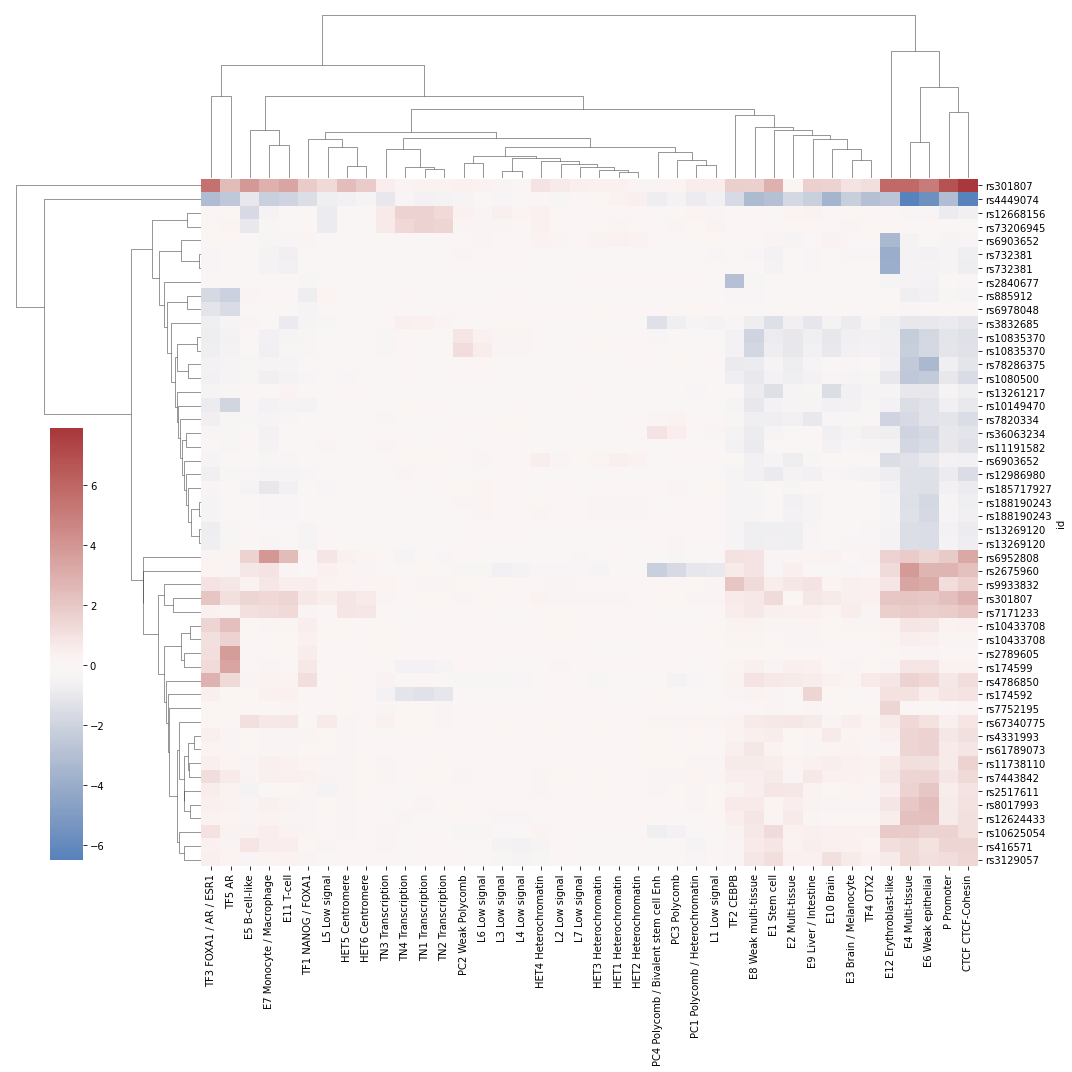

In [14]:
# making heatmaps of Sei scores for adult and fetal eqtls as well as general SNPs. 
# The general SNPs are all GWAS ones plus those in LD. The fetal/adult ones are those GWAS&LD SNPs that are in the fetal/adult GRN

# making general scores
onlyscores = data.drop(columns = ['seqclass_max_absdiff','highest_class','fetaleqtl','adulteqtl'])
onlyscores_id = onlyscores.set_index('id')
onlyscores = onlyscores.drop(columns = ['id'])

# general heatmap
sns.clustermap(onlyscores_id[0:50],cmap="vlag",center=0,figsize=(15,15),cbar_pos=(0.05, .2, .03, .4))
#plt.savefig('general_heatmap.pdf')


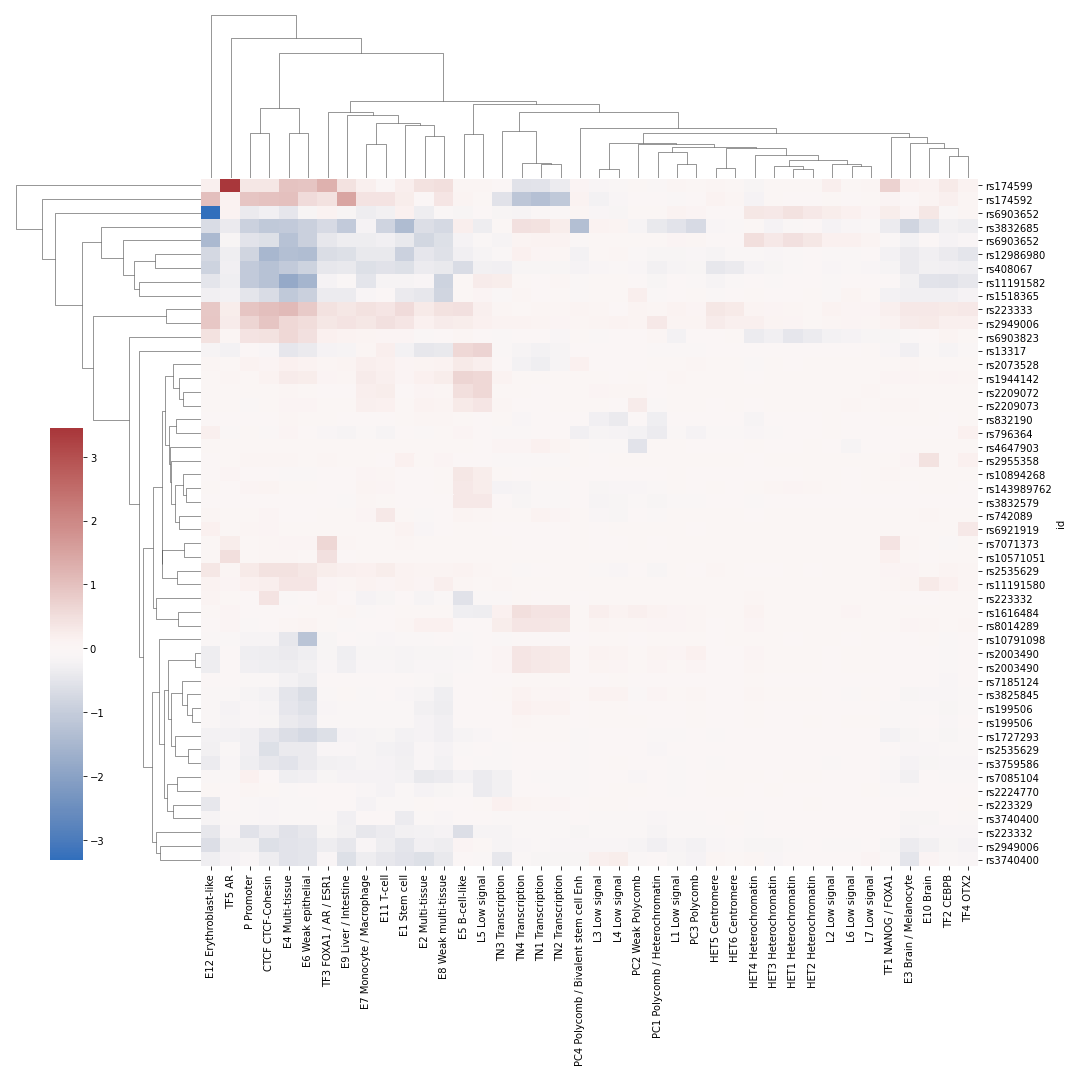

In [15]:
# making fetal scores
fetaldata = data.loc[data['fetaleqtl'] == 1]
fetalscores = fetaldata.drop(columns = ['seqclass_max_absdiff','highest_class','fetaleqtl','adulteqtl'])
fetalscores_id = fetalscores.set_index('id')
fetalscores = fetalscores.drop(columns = ['id'])

# fetal heatmap
sns.clustermap(fetalscores_id[0:50],cmap="vlag",center=0,figsize=(15,15),cbar_pos=(0.05, .2, .03, .4))
#plt.savefig('fetal_heatmap.pdf')


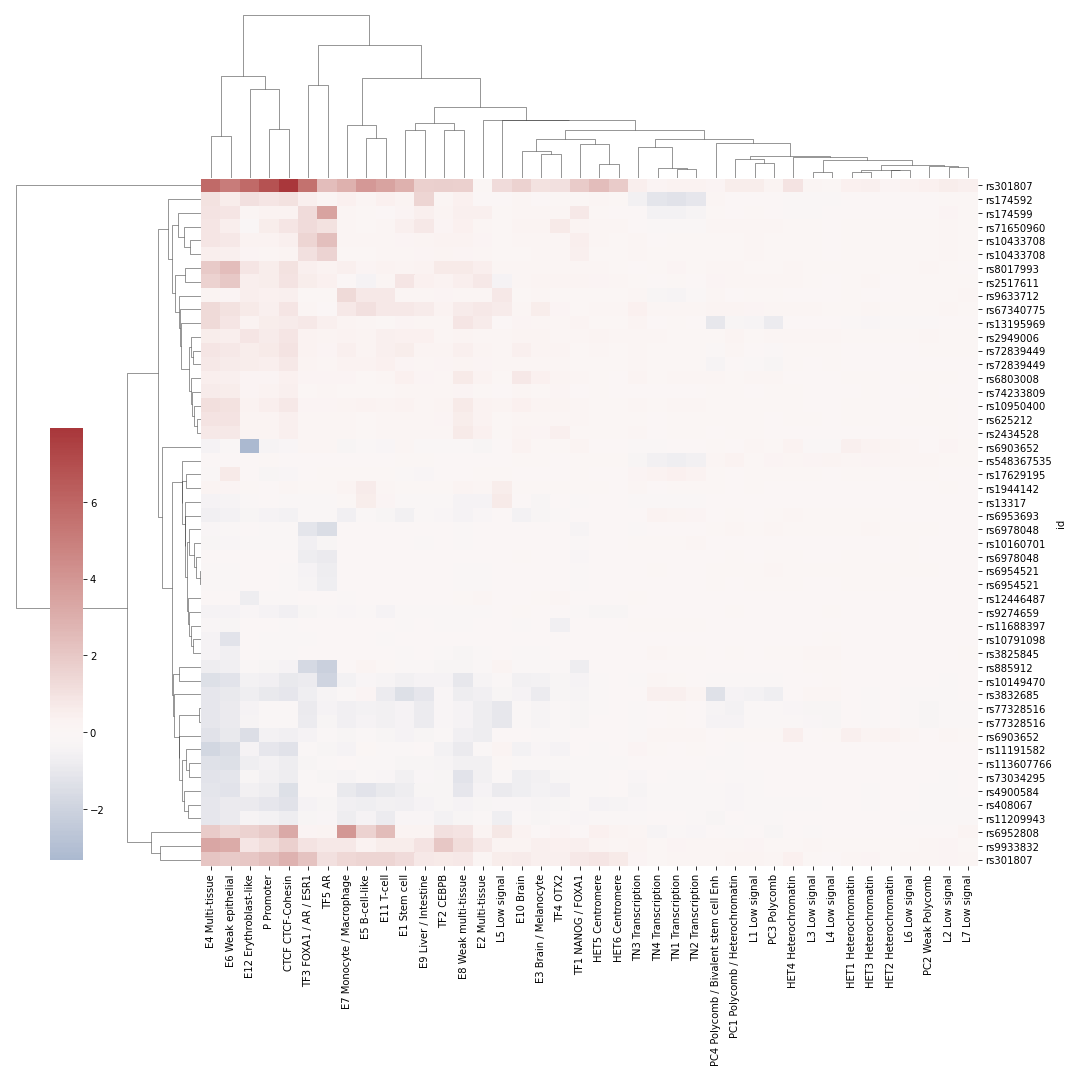

In [16]:
# making adult scores
adultdata = data.loc[data['adulteqtl'] == 1]
adultscores = adultdata.drop(columns = ['seqclass_max_absdiff','highest_class','fetaleqtl','adulteqtl'])
adultscores_id = adultscores.set_index('id')
adultscores = adultscores.drop(columns = ['id'])

# adult heatmap
sns.clustermap(adultscores_id[0:50],cmap="vlag",center=0,figsize=(15,15),cbar_pos=(0.05, .2, .03, .4))
#plt.savefig('adult_heatmap.pdf')


In [18]:
# download LD information on all snps
# This is the same as supplementary table S2
generalLD = pd.read_table('query_snp_ld.txt')
gen_loci = generalLD[['rsidq','rsidt']]
gen_loci = gen_loci.drop_duplicates(subset='rsidt')

In [19]:
# sort list by rsidt by adding it as a column
genscores_loci = gen_loci.set_index('rsidt').join(data.set_index('id'),how='inner')
genscores_loci = genscores_loci.sort_values(by=['rsidq','seqclass_max_absdiff'],ascending=False)

In [20]:
genscores_loci.head(30)

,rsidq,seqclass_max_absdiff,PC1 Polycomb / Heterochromatin,L1 Low signal,TN1 Transcription,TN2 Transcription,L2 Low signal,E1 Stem cell,E2 Multi-tissue,E3 Brain / Melanocyte,...,L7 Low signal,PC4 Polycomb / Bivalent stem cell Enh,HET5 Centromere,E11 T-cell,TF5 AR,E12 Erythroblast-like,HET6 Centromere,highest_class,fetaleqtl,adulteqtl
rs9933832,rs9922678,3.387125,0.133228,0.230086,0.212052,0.185018,0.216876,0.558117,0.801591,0.460103,...,8.790688e-02,0.159093,0.327497,0.554968,0.809941,0.912282,0.190141,E4 Multi-tissue,0,1
rs8054791,rs9922678,0.114086,0.109525,-0.015522,0.013952,0.007941,-0.015692,-0.031123,0.009500,-0.018688,...,1.787650e-04,-0.006229,0.002684,0.009977,-0.000603,0.003456,0.001640,L4 Low signal,0,0
rs67346571,rs9922678,0.067250,0.005934,-0.014978,0.012499,0.007794,-0.006535,-0.059926,-0.046387,-0.036377,...,3.597706e-03,-0.008126,-0.001108,-0.015757,-0.011088,-0.037260,-0.001086,TN4 Transcription,0,0
rs9934477,rs9922678,0.045446,-0.002535,-0.001089,-0.003769,-0.002258,-0.002592,0.001695,0.003426,0.000851,...,-1.314229e-03,0.001874,-0.000685,-0.002645,0.025855,0.000268,0.000357,TF3 FOXA1 / AR / ESR1,0,0
rs9922678,rs9922678,0.043205,-0.020443,-0.016236,0.003059,0.000430,-0.010490,0.011191,0.016687,-0.000907,...,-3.199120e-03,-0.003374,0.003447,0.017691,0.002729,0.015502,0.002346,E4 Multi-tissue,0,0
rs9922678,rs9922678,0.025181,0.007201,0.019665,-0.001121,0.001973,0.013240,0.005213,-0.005825,0.005934,...,5.757616e-03,0.014554,0.001370,-0.010982,0.000929,-0.004067,-0.000643,HET3 Heterochromatin,0,0
rs8063193,rs9922678,0.020101,-0.000512,-0.003734,-0.000025,-0.001406,-0.002683,-0.000385,0.001546,-0.001539,...,-2.407550e-03,0.000110,-0.000707,-0.000955,-0.000513,0.000089,-0.000420,E4 Multi-tissue,0,0
rs41356645,rs9922678,0.012639,-0.001260,0.003237,0.000526,0.001550,0.004416,0.001769,0.001067,0.001996,...,1.526086e-03,-0.001504,0.001186,0.000509,0.001059,0.000664,0.000477,TF2 CEBPB,0,0
rs9934669,rs9922678,0.005644,0.000208,0.000876,0.000070,0.000273,0.005644,0.000428,0.000474,0.000643,...,2.211758e-05,0.000227,0.000126,0.000534,0.000439,0.000501,0.000111,L2 Low signal,0,0
rs4327046,rs9922678,0.005369,-0.003248,-0.004218,-0.001672,-0.001470,-0.003255,-0.004888,-0.002639,-0.003878,...,-1.645823e-03,-0.001993,-0.001435,-0.002657,-0.002683,-0.003915,-0.000516,L5 Low signal,1,0


In [21]:
# what is the total number of loci?
loci = np.unique(genscores_loci['rsidq'])
print(np.size(loci))

424


In [22]:
# what loci are fetal?
fetalscores_loci = genscores_loci[genscores_loci.fetaleqtl == 1]
fetalloci = np.unique(fetalscores_loci['rsidq'])
fetalscores_loci = genscores_loci[genscores_loci['rsidq'].isin(fetalloci)]
print(np.size(fetalloci))

60


In [23]:
# what loci are adult?
adultscores_loci = genscores_loci[genscores_loci.adulteqtl == 1]
adultloci = np.unique(adultscores_loci['rsidq'])
adultscores_loci = genscores_loci[genscores_loci['rsidq'].isin(adultloci)]
print(np.size(adultloci))

113


In [24]:
# what loci are in neither?
neitherscores_loci = genscores_loci[~genscores_loci['rsidq'].isin(adultloci)]
neitherscores_loci = neitherscores_loci[~neitherscores_loci['rsidq'].isin(fetalloci)]
neitherloci = np.unique(neitherscores_loci['rsidq'])
print(np.size(neitherloci))

290


In [25]:
# What was the average absolute sequence class score for GWAS, fetal eQTLs, and adult eQTLs?
general_av = np.mean(neitherscores_loci['seqclass_max_absdiff'])
fetal_av = np.mean(fetalscores_loci['seqclass_max_absdiff'])
adult_av = np.mean(adultscores_loci['seqclass_max_absdiff'])

print(general_av)
print(fetal_av)
print(adult_av)

0.16584805401320243
0.22105735955290987
0.21521308037406153


In [26]:
# what percentage of fetal loci were enhancers?
fetalclass_loci = fetalscores_loci[['rsidq','highest_class']]
count = 0
i = 0
notenhancer = []
for typ in fetalclass_loci['highest_class']:
    if typ[0] != 'E':
        notenhancer.append(count)
        i = i+1
    count = count+1
fetalclass_loci = fetalclass_loci.drop(fetalclass_loci.index[notenhancer])

# number of loci in the fetal eqtls that contain an enhancer
fetalenhancerloci = np.size(np.unique(fetalclass_loci['rsidq']))
# total number of loci in the fetal eqtls
fetalenhancerprop = fetalenhancerloci/np.size(fetalloci)
# proportion of fetal loci that contain an enhancer
print(fetalenhancerprop)


0.6333333333333333


In [27]:
# what percentage of adult loci were enhancers?
adultclass_loci = adultscores_loci[['rsidq','highest_class']]
count = 0
i = 0
notenhancer = []
for typ in adultclass_loci['highest_class']:
    if typ[0] != 'E':
        notenhancer.append(count)
        i = i+1
    count = count+1
adultclass_loci = adultclass_loci.drop(adultclass_loci.index[notenhancer])

# number of loci in the adult eqtls that contain an enhancer
adultenhancerloci = np.size(np.unique(adultclass_loci['rsidq']))
# total number of loci in the fetal eqtls
adultenhancerprop = adultenhancerloci/np.size(adultloci)
# proportion of fetal loci that contain an enhancer
print(adultenhancerprop)


0.7256637168141593


In [28]:
# what percentage of 'neither' loci were enhancers?
neitherclass_loci = neitherscores_loci[['rsidq','highest_class']]
count = 0
i = 0
notenhancer = []
for typ in neitherclass_loci['highest_class']:
    if typ[0] != 'E':
        notenhancer.append(count)
        i = i+1
    count = count+1
neitherclass_loci = neitherclass_loci.drop(neitherclass_loci.index[notenhancer])

# number of loci in the adult eqtls that contain an enhancer
neitherenhancerloci = np.size(np.unique(neitherclass_loci['rsidq']))
# total number of loci in the fetal eqtls
neitherenhancerprop = neitherenhancerloci/np.size(neitherloci)
# proportion of fetal loci that contain an enhancer
print(neitherenhancerprop)


0.4862068965517241


In [29]:
# what percentage of fetal loci weren't low signal?
fetalclass_loci = fetalscores_loci[['rsidq','highest_class']]
count = 0
i = 0
lowsignal = []
for typ in fetalclass_loci['highest_class']:
    if typ[0] == 'L':
        lowsignal.append(count)
        i = i+1
    count = count+1
fetalclass_loci = fetalclass_loci.drop(fetalclass_loci.index[lowsignal])

# number of loci in the fetal eqtls that weren't low signal
fetalregloci = np.size(np.unique(fetalclass_loci['rsidq']))
# total number of loci in the fetal eqtls
fetalregprop = fetalregloci/np.size(fetalloci)
# proportion of fetal loci that weren't low signal
print(fetalregprop)

0.95


In [30]:
# what percentage of adult loci weren't low signal?
adultclass_loci = adultscores_loci[['rsidq','highest_class']]
count = 0
i = 0
lowsignal = []
for typ in adultclass_loci['highest_class']:
    if typ[0] == 'L':
        lowsignal.append(count)
        i = i+1
    count = count+1
adultclass_loci = adultclass_loci.drop(adultclass_loci.index[lowsignal])

# number of loci in the adult eqtls that weren't low signal
adultregloci = np.size(np.unique(adultclass_loci['rsidq']))
# total number of loci in the adult eqtls
adultregprop = adultregloci/np.size(adultloci)
# proportion of adult loci that contain an enhancer
print(adultregprop)

0.9734513274336283


In [31]:
# what percentage of non-eqtl loci weren't low signal?
neitherclass_loci = neitherscores_loci[['rsidq','highest_class']]
count = 0
i = 0
lowsignal = []
for typ in neitherclass_loci['highest_class']:
    if typ[0] == 'L':
        lowsignal.append(count)
        i = i+1
    count = count+1
neitherclass_loci = neitherclass_loci.drop(neitherclass_loci.index[lowsignal])

# number of loci in the non-eqtls that weren't low signal
neitherregloci = np.size(np.unique(neitherclass_loci['rsidq']))
# total number of loci in the non-eqtls
neitherregprop = neitherregloci/np.size(neitherloci)
# proportion of non-loci that contain an enhancer
print(neitherregprop)

0.8896551724137931


In [32]:
# Determining significance in differences
# Do a fishers exact test on the percentages of low signal - neither vs fetal
oddsratio,pvalue = stats.fisher_exact([[neitherregloci,fetalregloci],[np.size(neitherloci)-neitherregloci, np.size(fetalloci)-fetalregloci]], alternative='two-sided')
print('fetal vs neither low sig', pvalue)
# Do a fishers exact test on the percentages of low signal - neither vs adult
oddsratio,pvalue = stats.fisher_exact([[neitherregloci,adultregloci],[np.size(neitherloci)-neitherregloci, np.size(adultloci)-adultregloci]], alternative='two-sided')
print('adult vs neither low sig', pvalue)
# Do a fishers exact test on the percentages of low sig - adult vs fetal
oddsratio,pvalue = stats.fisher_exact([[adultregloci,fetalregloci],[np.size(adultloci)-adultregloci, np.size(fetalloci)-fetalregloci]], alternative='two-sided')
print('adult vs fetal low sig', pvalue)


# Do a fishers exact test on the percentages of enhancers - neither vs fetal
oddsratio,pvalue = stats.fisher_exact([[neitherenhancerloci,fetalenhancerloci],[np.size(neitherloci)-neitherenhancerloci, np.size(fetalloci)-fetalenhancerloci]], alternative='two-sided')
print('fetal vs neither enhancers', pvalue)
# Do a fishers exact test on the percentages of enhancers - neither vs adult
oddsratio,pvalue = stats.fisher_exact([[neitherenhancerloci,adultenhancerloci],[np.size(neitherloci)-neitherenhancerloci, np.size(adultloci)-adultenhancerloci]], alternative='two-sided')
print('adult vs neither enhancers', pvalue)
# Do a fishers exact test on the percentages of enhancers - adult vs fetal
oddsratio,pvalue = stats.fisher_exact([[adultenhancerloci,fetalenhancerloci],[np.size(adultloci)-adultenhancerloci, np.size(fetalloci)-fetalenhancerloci]], alternative='two-sided')
print('adult vs fetal enhancers', pvalue)



fetal vs neither low sig 0.23491825226838361
adult vs neither low sig 0.005480078956235127
adult vs fetal low sig 0.4189862207749715
fetal vs neither enhancers 0.04669393789100425
adult vs neither enhancers 1.2649779974728664e-05
adult vs fetal enhancers 0.22833366113722173


In [33]:
# Determining significance in differences in means
stat, pval = stats.ttest_ind(adultscores_loci['seqclass_max_absdiff'], neitherscores_loci['seqclass_max_absdiff'],equal_var=False)
print('adult vs neither', pval)

stat, pval = stats.ttest_ind(fetalscores_loci['seqclass_max_absdiff'], neitherscores_loci['seqclass_max_absdiff'],equal_var=False)
print('fetal vs neither', pval)

stat, pval = stats.ttest_ind(adultscores_loci['seqclass_max_absdiff'], fetalscores_loci['seqclass_max_absdiff'],equal_var=False)
print('adult vs fetal', pval)

adult vs neither 0.005762858076535981
fetal vs neither 0.007638284072170799
adult vs fetal 0.8100984297421406


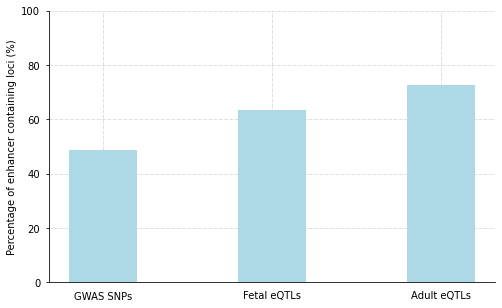

In [58]:
# Plotting the percentage of enhancers
data = {'GWAS SNPs':neitherenhancerprop*100, 'Fetal eQTLs':fetalenhancerprop*100, 'Adult eQTLs':adultenhancerprop*100}
labels = list(data.keys())
values = list(data.values())
  
fig,ax = plt.subplots(figsize = (8, 5))
 
# creating the bar plot
ax.bar(labels, values, color ='lightblue',
        width = 0.4)
for s in ['top','right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
#ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 5)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.5) 
ax.set_axisbelow(True)
    
plt.ylabel('Percentage of enhancer containing loci (%)')
plt.ylim(ymax=100)
plt.savefig('enhancerprop.pdf')

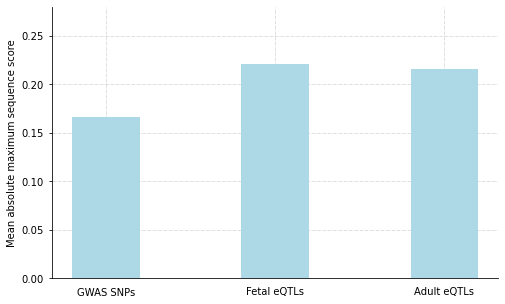

In [56]:
# Plotting the mean scores
data = {'GWAS SNPs':general_av, 'Fetal eQTLs':fetal_av, 'Adult eQTLs':adult_av}
labels = list(data.keys())
values = list(data.values())
  
fig,ax = plt.subplots(figsize = (8, 5))
 
# creating the bar plot
ax.bar(labels, values, color ='lightblue',
        width = 0.4)
for s in ['top','right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
#ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 5)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.5) 
ax.set_axisbelow(True)

plt.ylabel('Mean absolute maximum sequence score')
plt.ylim(ymax=0.28)
plt.savefig('meanscore.pdf')